# Zomato Bangalore Restaurant Analysis -Restaurant Recommendation System

## Introduction


The basic idea of analyzing the Zomato dataset is to get a fair idea about the factors affecting the establishment of different types of restaurant at different places in Bengaluru, aggregate rating of each restaurant, Bengaluru
being one such city has more than 12,000 restaurants with restaurants serving dishes from all over the world.

With each day new restaurants opening the industry has’nt been saturated yet and the demand is increasing
day by day. Inspite of increasing demand it however has become difficult for new restaurants to compete with
established restaurants. Most of them serving the same food. Bengaluru being an IT capital of India. Most of the people here are dependent mainly on the restaurant food as they don’t have time to cook for themselves.
With such an overwhelming demand of restaurants it has therefore become important to study the demography of a location.

What kind of a food is more popular in a locality. Do the entire locality loves vegetarian food. If yes then is that locality populated by a particular sect of people for eg. Jain, Marwaris, Gujaratis who are mostly vegetarian.

These kind of analysis can be done using the data, by studying the factors such as:
* Location of the restaurant
* Approx Price of food
* Theme based restaurant or not
* Which locality of that city serves that cuisines with maximum number of restaurants
* The needs of people who are striving to get the best cuisine of the neighborhood
* Is a particular neighborhood famous for its own kind of food.

**“Just so that you have a good meal the next time you step out”**



Phase I:

In Phase I of extraction only the URL, name and address of the restaurant were extracted which were visible on the front page. The URl's for each of the restaurants on the zomato were recorded in the csv file so that later the data can be extracted individually for each restaurant. This made the extraction process easier and reduced the extra load on my machine. The data for each neighborhood and each category can be found here

Phase II:

In Phase II the recorded data for each restaurant and each category was read and data for each restaurant was scraped individually. 15 variables were scraped in this phase. For each of the neighborhood and for each category their online_order, book_table, rate, votes, phone, location, rest_type, dish_liked, cuisines, approx_cost(for two people), reviews_list, menu_item was extracted. See section 5 for more details about the variables.

Phase III:

In Phase III, Sentiment Analysis of Reviews of the dataset to identify the feelings of the users towards Restaurants. Sentiment analysis is the computational task of automatically determining what feelings a writer is expressing in text. Sentiment is often framed as a binary distinction (positive vs. negative), but it can also be a more fine-grained, like identifying the specific emotion an author is expressing (like fear, joy or anger).

Phase IV:

The rapid growth of data collection has led to a new era of information. Data is being used to create more efficient systems and this is where Recommendation Systems come into play. Recommendation Systems are a type of information filtering systems as they improve the quality of search results and provides items that are more relevant to the search item or are realted to the search history of the user. They are active information filtering systems which personalize the information coming to a user based on his interests, relevance of the information etc. Recommender systems are used widely for recommending movies, articles, restaurants, places to visit, items to buy etc. Here I will be using Content Based Filtering Content-Based Filtering: This method uses only information about the description and attributes of the items users has previously consumed to model user's preferences. In other words, these algorithms try to recommend items that are similar to those that a user liked in the past (or is examining in the present). In particular, various candidate items are compared with items previously rated by the user and the best-matching items are recommended.

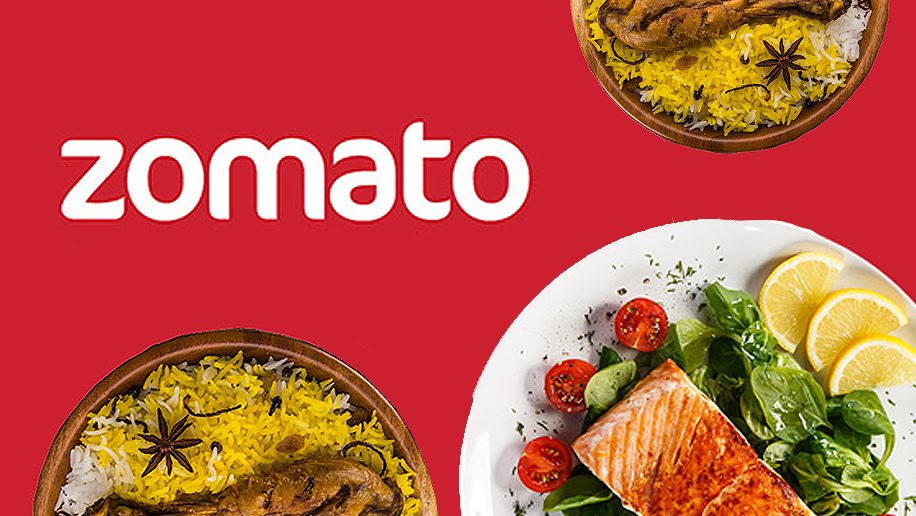

**Acknowledgements**

The data scraped was entirely for educational purposes only. Note that I don’t claim any copyright for the data. All copyrights for the data is owned by Zomato Media Pvt. Ltd..

Dataset Link - https://www.kaggle.com/datasets/himanshupoddar/zomato-bangalore-restaurants

In [ ]:
#Kernel Settings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#Mounting Google Drive to import dataset Directly from Drive
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive/My Drive/MScProject

Mounted at /gdrive
/gdrive/My Drive/MScProject


## Data Preparation


### 1. Loading the dataset and print first few rows of dataset

We'll begin by loading the dataset using the pandas library.

In [ ]:
import pandas as pd
import numpy as np

# Load the dataset
df = pd.read_csv("zomato.csv")

In [ ]:
# Check the dataset's shape
print(df.shape)

(51717, 17)


In [ ]:
# Print the first few rows
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


### 2. Cleaning the data

Next, we'll clean the data by removing unnecessary columns and renaming the columns to more meaningful names.

In [ ]:
# Remove unnecessary columns
df = df.drop(['phone', 'dish_liked', 'menu_item'], axis=1)

# Rename columns
df = df.rename(columns={'approx_cost(for two people)': 'cost', 'listed_in(type)': 'type',
                        'listed_in(city)': 'city'})

In [ ]:
df.head()

,url,address,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,reviews_list,type,city
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",Buffet,Banashankari


### 3. Handling missing values

We'll check if there are any missing values in the dataset and handle them appropriately.

In [ ]:
# Check for missing values
print(df.isnull().sum())

# Replace missing values in 'location' column with 'Unknown'
df['location'] = df['location'].fillna('Unknown')

# Drop rows with missing values in 'rest_type' and 'cuisines' columns
df = df.dropna(subset=['rest_type', 'cuisines'])

url                0
address            0
name               0
online_order       0
book_table         0
rate            7775
votes              0
location          21
rest_type        227
cuisines          45
cost             346
reviews_list       0
type               0
city               0
dtype: int64


In [ ]:
# Replace missing values in 'cost' column with median value
df['cost'] = df['cost'].str.replace(',', '')
df['cost'] = df['cost'].astype(float)
df['cost'] = df['cost'].fillna(df['cost'].median())

In [ ]:
# Replace missing values in 'rate' column with median value
df['rate'] = df['rate'].replace(['NEW', '-', np.nan], '0')
df['rate'] = df['rate'].apply(lambda x: float(x.split('/')[0]) if type(x) != float else x)
df['rate'] = df['rate'].replace(0, df['rate'].median())

In [ ]:
# Check for missing values again
print(df.isnull().sum())

url             0
address         0
name            0
online_order    0
book_table      0
rate            0
votes           0
location        0
rest_type       0
cuisines        0
cost            0
reviews_list    0
type            0
city            0
dtype: int64


### 4. Handling Duplicates

We'll check if there are any duplicate rows in the dataset and remove them.

In [ ]:
# Check for duplicate rows
print("Duplicate rows before: ",df.duplicated().sum())

# Drop duplicate rows
df = df.drop_duplicates()

print("Duplicate rows After: ",df.duplicated().sum())

Duplicate rows before:  0
Duplicate rows After:  0


### 5. Handling Categorical Variables

We'll convert categorical variables to numerical variables using one-hot encoding.

In [ ]:
# Convert categorical variables to numerical variables using one-hot encoding
df_onehot = pd.get_dummies(df, columns=['location', 'online_order', 'book_table', 'rest_type'])

In [ ]:
df_onehot.head()

,url,address,name,rate,votes,cuisines,cost,reviews_list,type,city,...,"rest_type_Quick Bites, Food Court","rest_type_Quick Bites, Kiosk","rest_type_Quick Bites, Meat Shop","rest_type_Quick Bites, Mess","rest_type_Quick Bites, Sweet Shop",rest_type_Sweet Shop,"rest_type_Sweet Shop, Dessert Parlor","rest_type_Sweet Shop, Quick Bites",rest_type_Takeaway,"rest_type_Takeaway, Delivery"
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,4.1,775,"North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",Buffet,Banashankari,...,0,0,0,0,0,0,0,0,0,0
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,4.1,787,"Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",Buffet,Banashankari,...,0,0,0,0,0,0,0,0,0,0
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,3.8,918,"Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",Buffet,Banashankari,...,0,0,0,0,0,0,0,0,0,0
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,3.7,88,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",Buffet,Banashankari,...,0,0,0,0,0,0,0,0,0,0
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,3.8,166,"North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",Buffet,Banashankari,...,0,0,0,0,0,0,0,0,0,0


### 6. Feature engineering:

We'll perform feature engineering by extracting the rating value from the 'rate' column and creating a new 'rating' column.

In [ ]:
# Feature engineering
df['rating'] = df['rate'].apply(lambda x: 'Unknown' if x == 0 else 'Poor' if x < 2.5 else 'Average' if x < 3.5 else 'Good' if x < 4.0 else 'Very Good' if x < 4.5 else 'Excellent')
df['rating'].value_counts(normalize=True)

Good         0.537656
Average      0.218008
Very Good    0.216609
Excellent    0.024171
Poor         0.003556
Name: rating, dtype: float64

In [ ]:
## Computing Mean rating
restaurants = list(df['name'].unique())
df['Mean Rating'] = 0

for i in range(len(restaurants)):
    df['Mean Rating'][df['name']==restaurants[i]] = df['rate'][df['name']==restaurants[i]].mean()

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(1,5))
df[['Mean Rating']] = scaler.fit_transform(df[['Mean Rating']]).round(2)

df.sample(3)

,url,address,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,reviews_list,type,city,rating,Mean Rating
44467,https://www.zomato.com/bangalore/the-bel-st-ne...,"205, New BEL Road, Bangalore",THE BEL ST.,No,No,3.9,523,New BEL Road,"Cafe, Casual Dining","Cafe, Italian, American, Continental",1100.0,"[('Rated 4.0', 'RATED\n This place is good fo...",Dine-out,New BEL Road,Good,3.71
51067,https://www.zomato.com/bangalore/hyderabad-che...,"120-A2, First Floor, EPIP Area, Whitefield, Ba...",Hyderabad Chefs,Yes,No,4.0,277,Whitefield,Casual Dining,"Hyderabadi, Andhra, North Indian, Chinese, Sou...",800.0,"[('Rated 4.0', 'RATED\n CanÃ\x83Ã\x83Ã\x82...",Dine-out,Whitefield,Very Good,3.84
1491,https://www.zomato.com/bangalore/kabab-treat-b...,"Arekere Village, 80 Feet Road, Opposite Paramo...",Kabab Treat,Yes,No,2.8,334,Bannerghatta Road,Casual Dining,"North Indian, Chinese",500.0,"[('Rated 2.0', 'RATED\n Every Chicken gravey ...",Delivery,Bannerghatta Road,Average,2.29


## Exploratory Data Analysis (EDA)

In [ ]:
# Import necessary libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('dark_background')

In [ ]:
# Let's get statistical information about numerical columns
df.describe()

,rate,votes,cost,Mean Rating
count,51466.000000,51466.000000,51466.000000,51466.000000
mean,3.682383,284.764408,555.079567,3.428443
std,0.397025,805.597108,438.365780,0.480992
min,1.800000,0.000000,40.000000,1.000000
25%,3.500000,7.000000,300.000000,3.190000
50%,3.600000,41.000000,400.000000,3.320000
75%,3.900000,199.000000,650.000000,3.710000
max,4.900000,16832.000000,6000.000000,5.000000


In [ ]:
df.head()

,url,address,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,reviews_list,type,city,rating,Mean Rating
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",Buffet,Banashankari,Very Good,3.99
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",Buffet,Banashankari,Very Good,3.97
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",Buffet,Banashankari,Good,3.58
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",Buffet,Banashankari,Good,3.45
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",Buffet,Banashankari,Good,3.58


### Visualizations

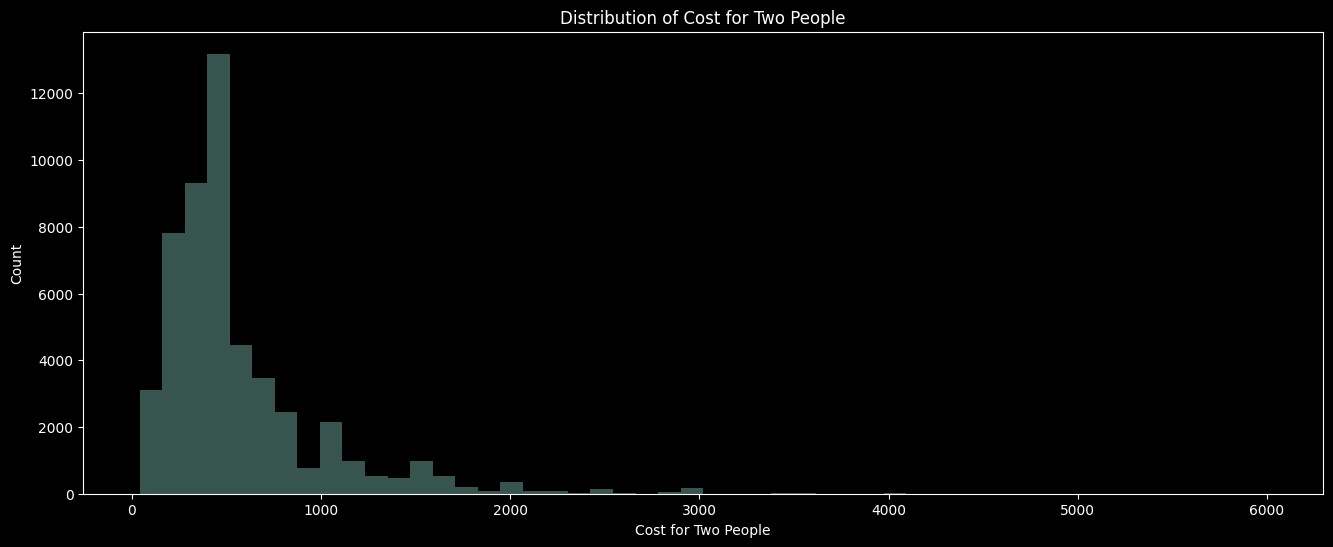

In [ ]:
#Distribution cost for Two People
plt.figure(figsize=(16, 6))
sns.distplot(df['cost'], kde=False)
plt.title('Distribution of Cost for Two People')
plt.xlabel('Cost for Two People')
plt.ylabel('Count')
plt.show()

* The majority of the restaurants have a cost for two people below 2000 INR. However, there are some restaurants that are more expensive, with costs ranging up to 6000 INR for two people.

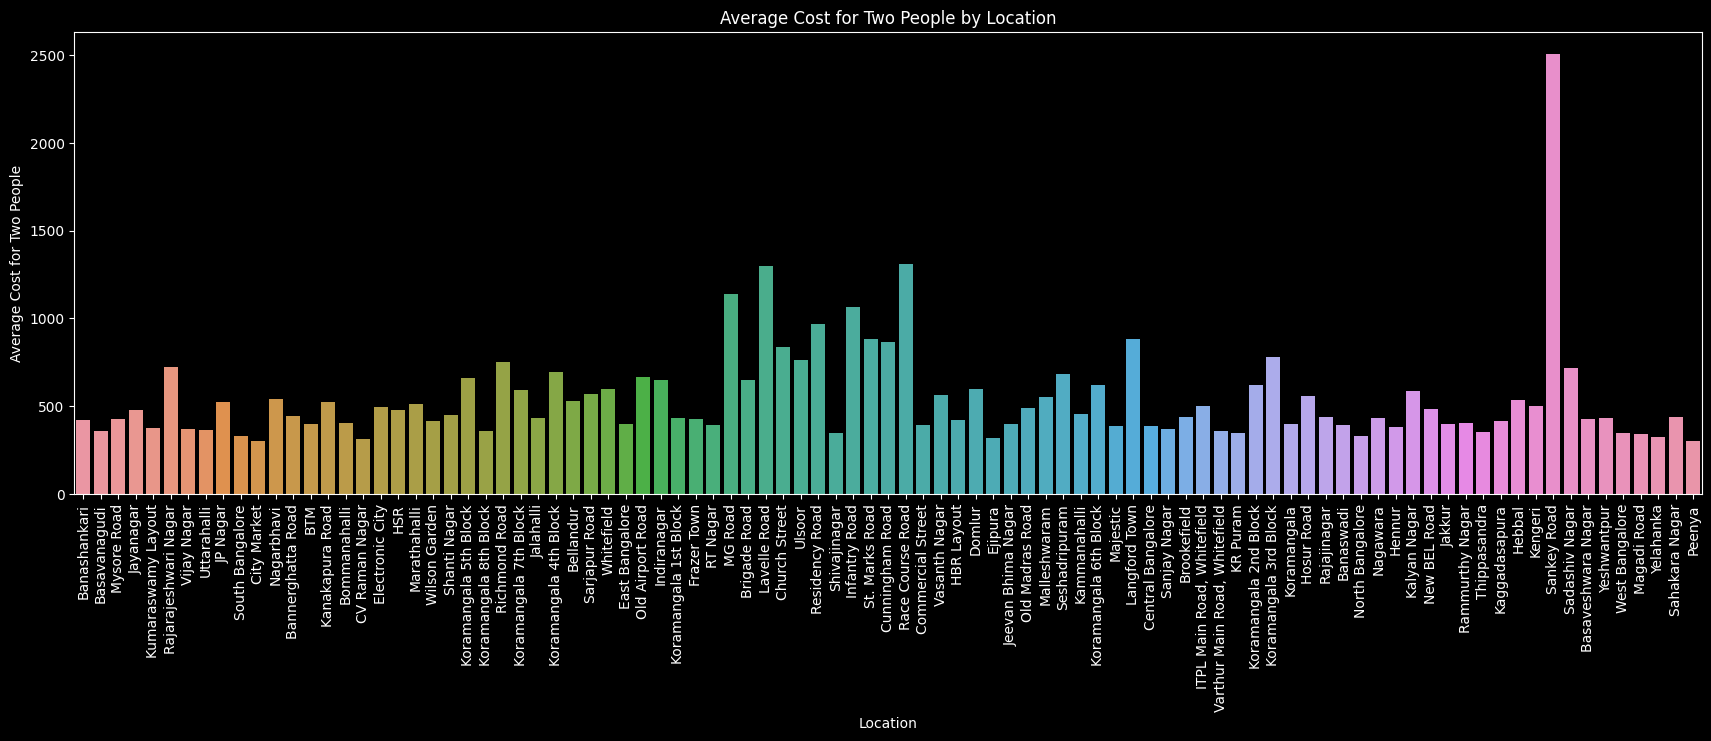

In [ ]:
#Average Cost for Two People by Location
plt.figure(figsize=(21, 6))
sns.barplot(x='location', y='cost', data=df, ci=None)
plt.title('Average Cost for Two People by Location')
plt.xlabel('Location')
plt.ylabel('Average Cost for Two People')
plt.xticks(rotation=90)
plt.show()

* The Average Cost for two people in most restaurants is from 500-1300 INR except in Sankey Road it is 2400INR.

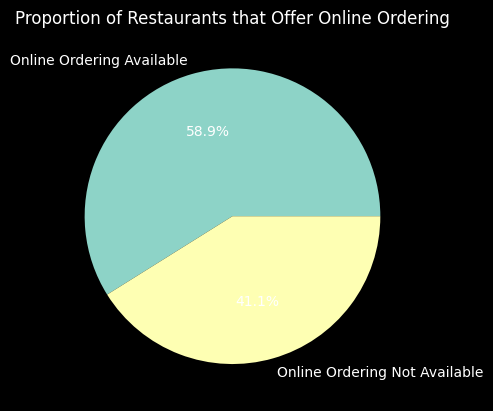

In [ ]:
#How many Restaurants have online order available
plt.pie(df['online_order'].value_counts(), labels=['Online Ordering Available', 'Online Ordering Not Available'], autopct='%1.1f%%')
plt.title('Proportion of Restaurants that Offer Online Ordering')
plt.show()

* Almost 60% of the restaurants on Zomato in Bangalore offer online ordering, while the remaining 40% do not.

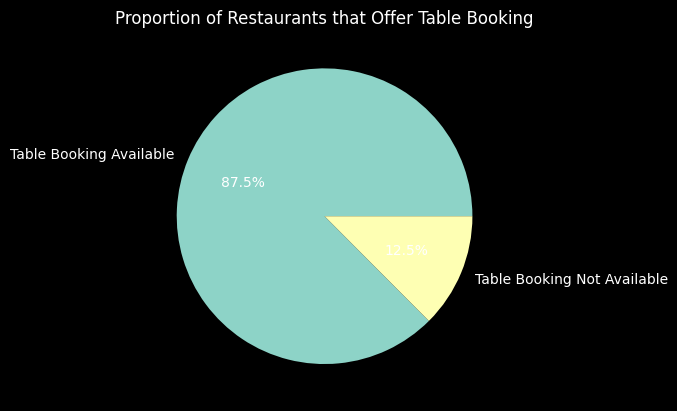

In [ ]:
#In how many restaurants you can book table
plt.pie(df['book_table'].value_counts(), labels=['Table Booking Available', 'Table Booking Not Available'], autopct='%1.1f%%')
plt.title('Proportion of Restaurants that Offer Table Booking')
plt.show()

* Book table availability is much more common, with only around 12% of restaurants on Zomato in Bangalore are not offering this service

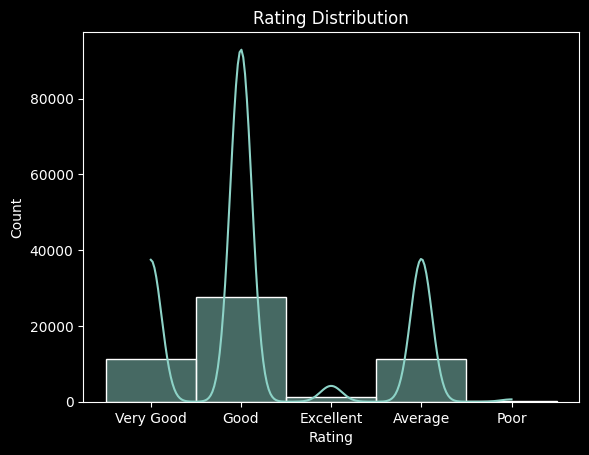

In [ ]:
# Distribution of Ratings of Restaurants
sns.histplot(data=df, x='rating', kde=True)
plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

* Most of the Restaurants fall under Average or Good Category.

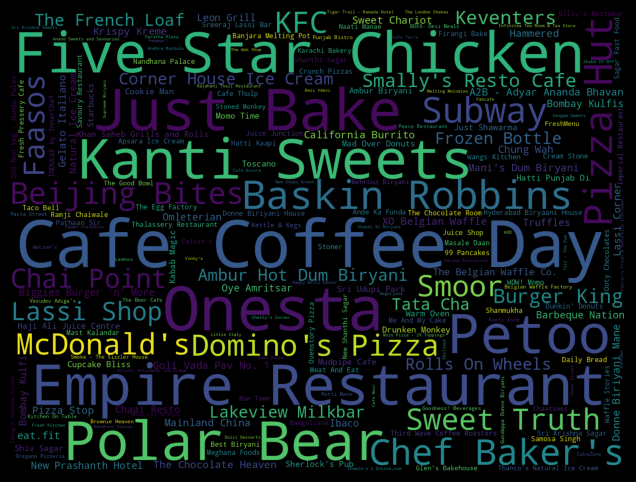

In [ ]:
from subprocess import check_output
from wordcloud import WordCloud
wordcloud = (WordCloud(width=1440, height=1080, relative_scaling=0.5).generate_from_frequencies(df['name'].value_counts()))


fig = plt.figure(1,figsize=(21, 6))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

* Cafe Coffe Day and Onesta has highest number ordered restaurants in Banglore, City.
* Top food chains such as Baskin Robbins, Pizza Hut, Domino's Piza, KFC, Subway, etc. are also present.

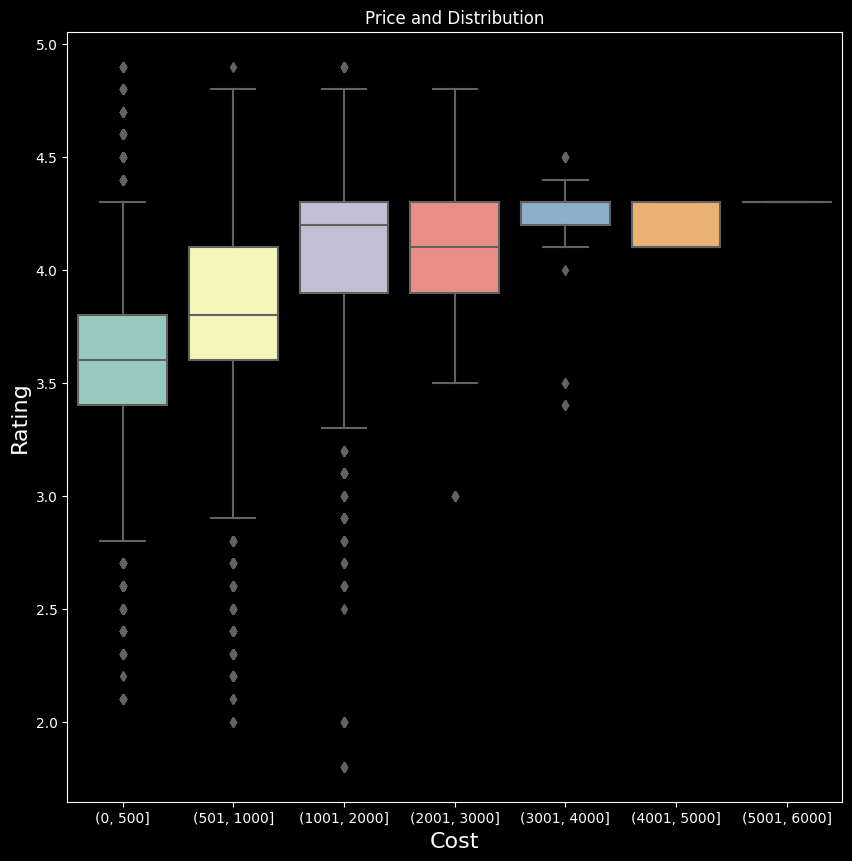

In [ ]:
# Now lets plot box plot based on the cost of food
bins = pd.IntervalIndex.from_tuples([(0, 500), (501, 1000), (1001, 2000), (2001, 3000), (3001, 4000), (4001, 5000), (5001, 6000)])
df['cost_cat'] = pd.cut(df['cost'], bins)

plt.figure(figsize=(10,10))
ax = sns.boxplot(x="cost_cat", y="rate", data=df)
ax.set_xlabel('Cost', fontsize=16)
ax.set_ylabel('Rating', fontsize=16)
ax.set_title('Price and Distribution')
df.drop('cost_cat', axis=1, inplace=True)

It can be seen that as the price increases the average rating of restaurants also increase.

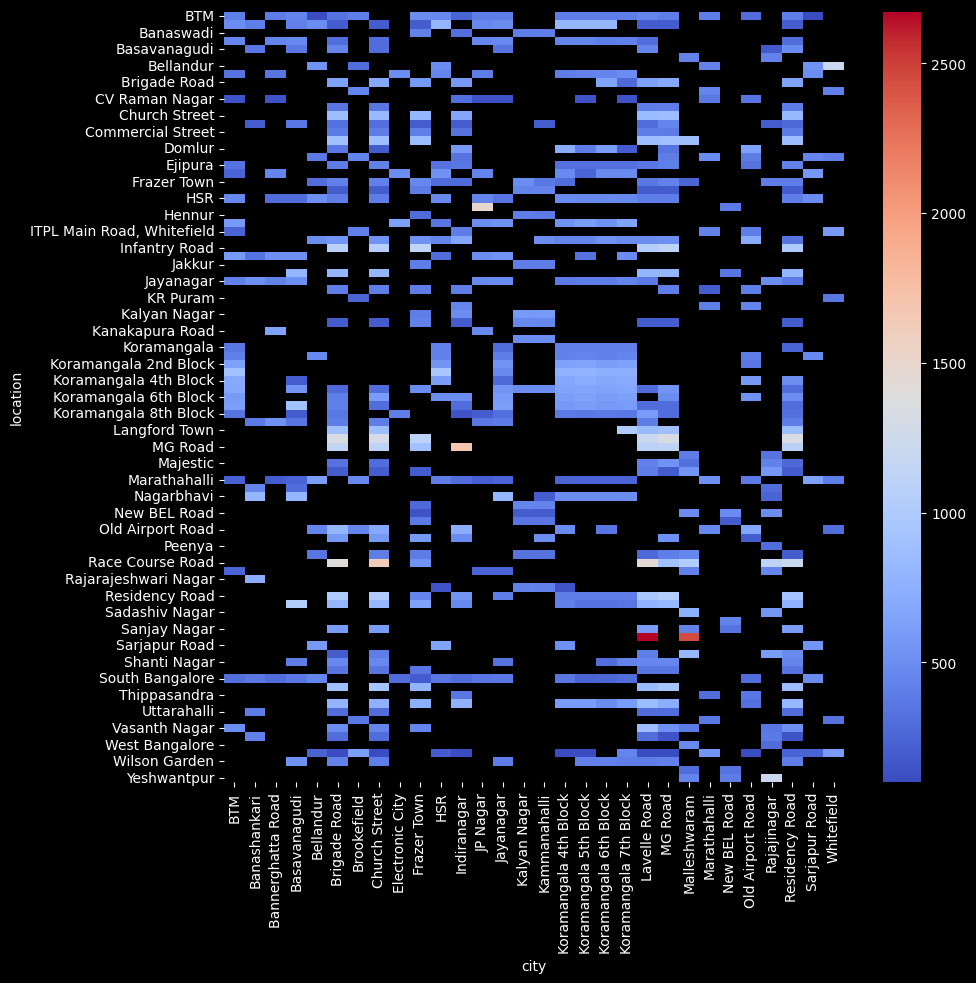

In [ ]:
loc_city_df = df.pivot_table(values='cost', index='location', columns='city', aggfunc=np.mean)
plt.figure(figsize=(10,10))
sns.heatmap(loc_city_df, cmap='coolwarm')
plt.show()

* Restaurants in the CBD area tend to be more expensive than restaurants in other parts of Bangalore.
* Restaurants in the Whitefield and Bannerghatta Road areas tend to be less expensive.
* The average cost of restaurants in each listed_in(city) category varies widely, with some categories having much higher costs on average than others.

In [ ]:
#Most Expensive Cities

inter=df.groupby("city")[["cost"]].mean()
sol=inter.sort_values(by="cost",ascending=False).head()
sol.style.background_gradient(cmap="YlOrRd",high=0.5)

,cost
city,
Church Street,770.564074
Brigade Road,767.091115
MG Road,760.160487
Lavelle Road,752.016667
Residency Road,740.265306


In [ ]:
#Most Affordable Cities

inter=df.groupby("city")[["cost"]].mean()
sol=inter.sort_values(by="cost").head()
sol.style.background_gradient(cmap="YlOrRd",high=0.5)

,cost
city,
Banashankari,402.487209
Basavanagudi,445.216601
Bannerghatta Road,452.707424
New BEL Road,456.842818
JP Nagar,460.081770


In [ ]:
# Choose City

city="Banashankari"

inter=df[df["city"]=="Banashankari"]

d1=inter.groupby("type")["type"].count().sort_values(ascending=False)
d2=inter.groupby("type")["cost"].agg(['min','median','max'])

#cpp=cost per person
sol=pd.concat([d1,d2],axis=1)
cols=['No','Min_cpp','Median_cpp','Max_cpp']
sol.columns=cols
sol.style.background_gradient(cmap="YlOrRd",high=0.5)

,No,Min_cpp,Median_cpp,Max_cpp
type,,,,
Delivery,461,100.000000,300.000000,1500.000000
Dine-out,301,80.000000,300.000000,1300.000000
Desserts,59,100.000000,300.000000,800.000000
Cafes,24,200.000000,550.000000,900.000000
Drinks & nightlife,8,500.000000,900.000000,1300.000000
Buffet,7,300.000000,800.000000,800.000000


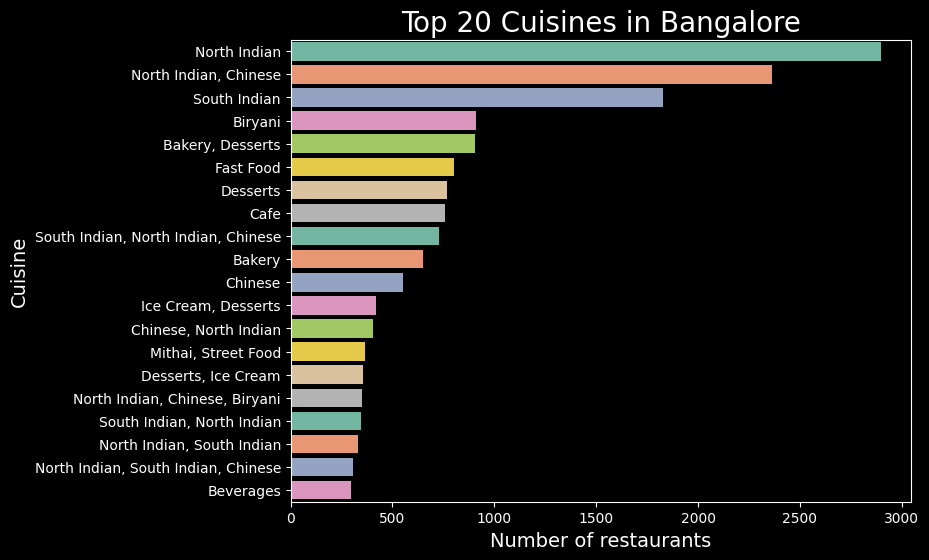

In [ ]:
#Top 20 cuisines in Bangalore
plt.figure(figsize=(8,6))
cuisines = df['cuisines'].value_counts()[:20]
sns.barplot(x=cuisines.values, y=cuisines.index, palette='Set2')
plt.title("Top 20 Cuisines in Bangalore", fontsize=20)
plt.xlabel("Number of restaurants", fontsize=14)
plt.ylabel("Cuisine", fontsize=14)
plt.show()

* The most popular cuisine in Bangalore is North Indian, followed by Chinese and South Indian.

### Heatmaps

In [ ]:
from geopy.geocoders import Nominatim
from folium.plugins import HeatMap
import folium

In [ ]:
# Extracting location information using Geopy
locations=pd.DataFrame({"Name":df['location'].unique()})
locations['Name']=locations['Name'].apply(lambda x: "Bangalore " + str(x))
lat_lon=[]
geolocator=Nominatim(user_agent="app")
for location in locations['Name']:
    location = geolocator.geocode(location)
    if location is None:
        lat_lon.append(np.nan)
    else:
        geo=(location.latitude,location.longitude)
        lat_lon.append(geo)


In [ ]:
locations['geo_loc']=lat_lon
locations.to_csv('locations.csv',index=False)
locations["Name"] = locations['Name'].apply(lambda x: " ".join(filter(lambda y: y!="Bangalore",x.split())))
locations.head()

,Name,geo_loc
0,Banashankari,"(12.9152208, 77.573598)"
1,Basavanagudi,"(12.9417261, 77.5755021)"
2,Mysore Road,"(12.9030191, 77.4697098)"
3,Jayanagar,"(12.9292731, 77.5824229)"
4,Kumaraswamy Layout,"(12.9081487, 77.5553179)"


In [ ]:
#Heatmap of restaurant count on each location
Rest_locations=pd.DataFrame(df['location'].value_counts().reset_index())
Rest_locations.columns=['Name','count']
Rest_locations=Rest_locations.merge(locations,on='Name',how="left").dropna()
Rest_locations['count'].max()

5097

In [ ]:
def generateBaseMap(default_location=[12.97, 77.59], default_zoom_start=12):
    base_map = folium.Map(location=default_location, control_scale=True, zoom_start=default_zoom_start)
    return base_map

In [ ]:
lat,lon=zip(*np.array(Rest_locations['geo_loc']))
Rest_locations['lat']=lat
Rest_locations['lon']=lon
basemap=generateBaseMap()
HeatMap(Rest_locations[['lat','lon','count']].values.tolist(),zoom=20,radius=15).add_to(basemap)

In [ ]:
basemap

* It is clear thar restaurants tend to concentrate in central Bangalore area.
* So,potential restaurant entrepreneurs can refer this and find out good locations for their venture.

In [ ]:
# Hotspot of North Indian restaurants
def produce_data(col,name):
    data= pd.DataFrame(df[df[col]==name].groupby(['location'],as_index=False)['url'].agg('count'))
    data.columns=['Name','count']
    print(data.head())
    data=data.merge(locations,on="Name",how='left').dropna()
    data['lan'],data['lon']=zip(*data['geo_loc'].values)
    return data.drop(['geo_loc'],axis=1)

North_India=produce_data('cuisines','North Indian')

                Name  count
0                BTM    340
1       Banashankari     36
2          Banaswadi      8
3  Bannerghatta Road     75
4       Basavanagudi     21


In [ ]:
basemap=generateBaseMap()
HeatMap(North_India[['lan','lon','count']].values.tolist(),zoom=20,radius=15).add_to(basemap)
basemap

* So it is interesting to see cluster of North Indian restaurants in South Banglore Area.
* This may indicate that these areas are more populated by North Indians or migrants who came for a job

In [ ]:
# South Indian restaurants
food = produce_data('cuisines','South Indian')
basemap = generateBaseMap()
HeatMap(food[['lan','lon','count']].values.tolist(),zoom=20,radius=15).add_to(basemap)

                Name  count
0                BTM    113
1       Banashankari     86
2          Banaswadi     37
3  Bannerghatta Road     48
4       Basavanagudi     89


In [ ]:
basemap

* They tend to span all over Bangalore
* South Indian cuisines tend to cluster near central Bangalore.

In [ ]:
# Chinese restaurants
food = produce_data('cuisines','Chinese')
basemap = generateBaseMap()
HeatMap(food[['lan','lon','count']].values.tolist(),zoom=20,radius=15).add_to(basemap)

                 Name  count
0                 BTM     58
1           Banaswadi     11
2   Bannerghatta Road     14
3        Basavanagudi     12
4  Basaveshwara Nagar      1


In [ ]:
basemap

* They too tend to span all over Bangalore
* Chinese cuisines are famous all over Bangalaore

### Analysing Restaurant Chains & Reviews

In [ ]:
def produce_chains(name):
    data_chain = pd.DataFrame(df[df["name"]==name]['locatin'].value_counts().reset_index())
    data_chains.columns = ['Name','Count']
    data_chain=data_chain.merge(locations, on="Name", how="left").dropna()
    data_chain['lan'],data_chain['lon']=zip(*data_chain['geo_loc'].values)
    return data_chain[['Name','Count', 'lan','lon']]

In [ ]:
df_1=df.groupby(['rest_type','name']).agg('count')
datas=df_1.sort_values(['url'],ascending=False).groupby(['rest_type'],
                as_index=False).apply(lambda x : x.sort_values(by="url",ascending=False).head(3))['url'].reset_index().rename(columns={'url':'count'})

In [ ]:
casual=datas[datas['rest_type']=='Casual Dining']
casual

,level_0,rest_type,name,count
59,27,Casual Dining,Empire Restaurant,58
60,27,Casual Dining,Beijing Bites,48
61,27,Casual Dining,Mani's Dum Biryani,47


* We can see that Empire Restaurant, Mani's Dum Biryani, and Chung Wah are the most popular casual dining restauant chains in Bangalore.

In [ ]:
cafe=datas[datas['rest_type']=='Cafe']
cafe

,level_0,rest_type,name,count
41,19,Cafe,Cafe Coffee Day,96
42,19,Cafe,Smally's Resto Cafe,54
43,19,Cafe,Mudpipe Cafe,39


* We can see that Cafe Coffee Day, Smally's Resto Cafe, and Mudpipe Cafe are the most popular Cafe Restauant chains in Bangalore.

In [ ]:
quickie=datas[datas['rest_type']=='Quick Bites']
quickie

,level_0,rest_type,name,count
179,78,Quick Bites,Five Star Chicken,69
180,78,Quick Bites,Domino's Pizza,60
181,78,Quick Bites,McDonald's,59


In [ ]:
# Analysing Reviews

from tqdm import tqdm
import re

all_ratings = []
for name, ratings in tqdm(zip(df['name'],df['reviews_list'])):
    ratings = eval(ratings)
    for score, doc in ratings:
        if score:
            score = score.strip("Rated").strip()
            doc = doc.strip('RATED').strip()
            score = float(score)
            all_ratings.append([name, score, doc])

51466it [00:31, 1642.93it/s]


In [ ]:
rating_df=pd.DataFrame(all_ratings,columns=['name','rating','review'])
rating_df['review']=rating_df['review'].apply(lambda x : re.sub('[^a-zA-Z0-9\s]',"",x))

In [ ]:
rating_df.to_csv('Ratings.csv')

In [ ]:
rating_df.head()

,name,rating,review
0,Jalsa,4.0,A beautiful place to dine inThe interiors take...
1,Jalsa,4.0,I was here for dinner with my family on a week...
2,Jalsa,2.0,Its a restaurant near to Banashankari BDA Me a...
3,Jalsa,4.0,We went here on a weekend and one of us had th...
4,Jalsa,5.0,The best thing about the place is its ambiance...


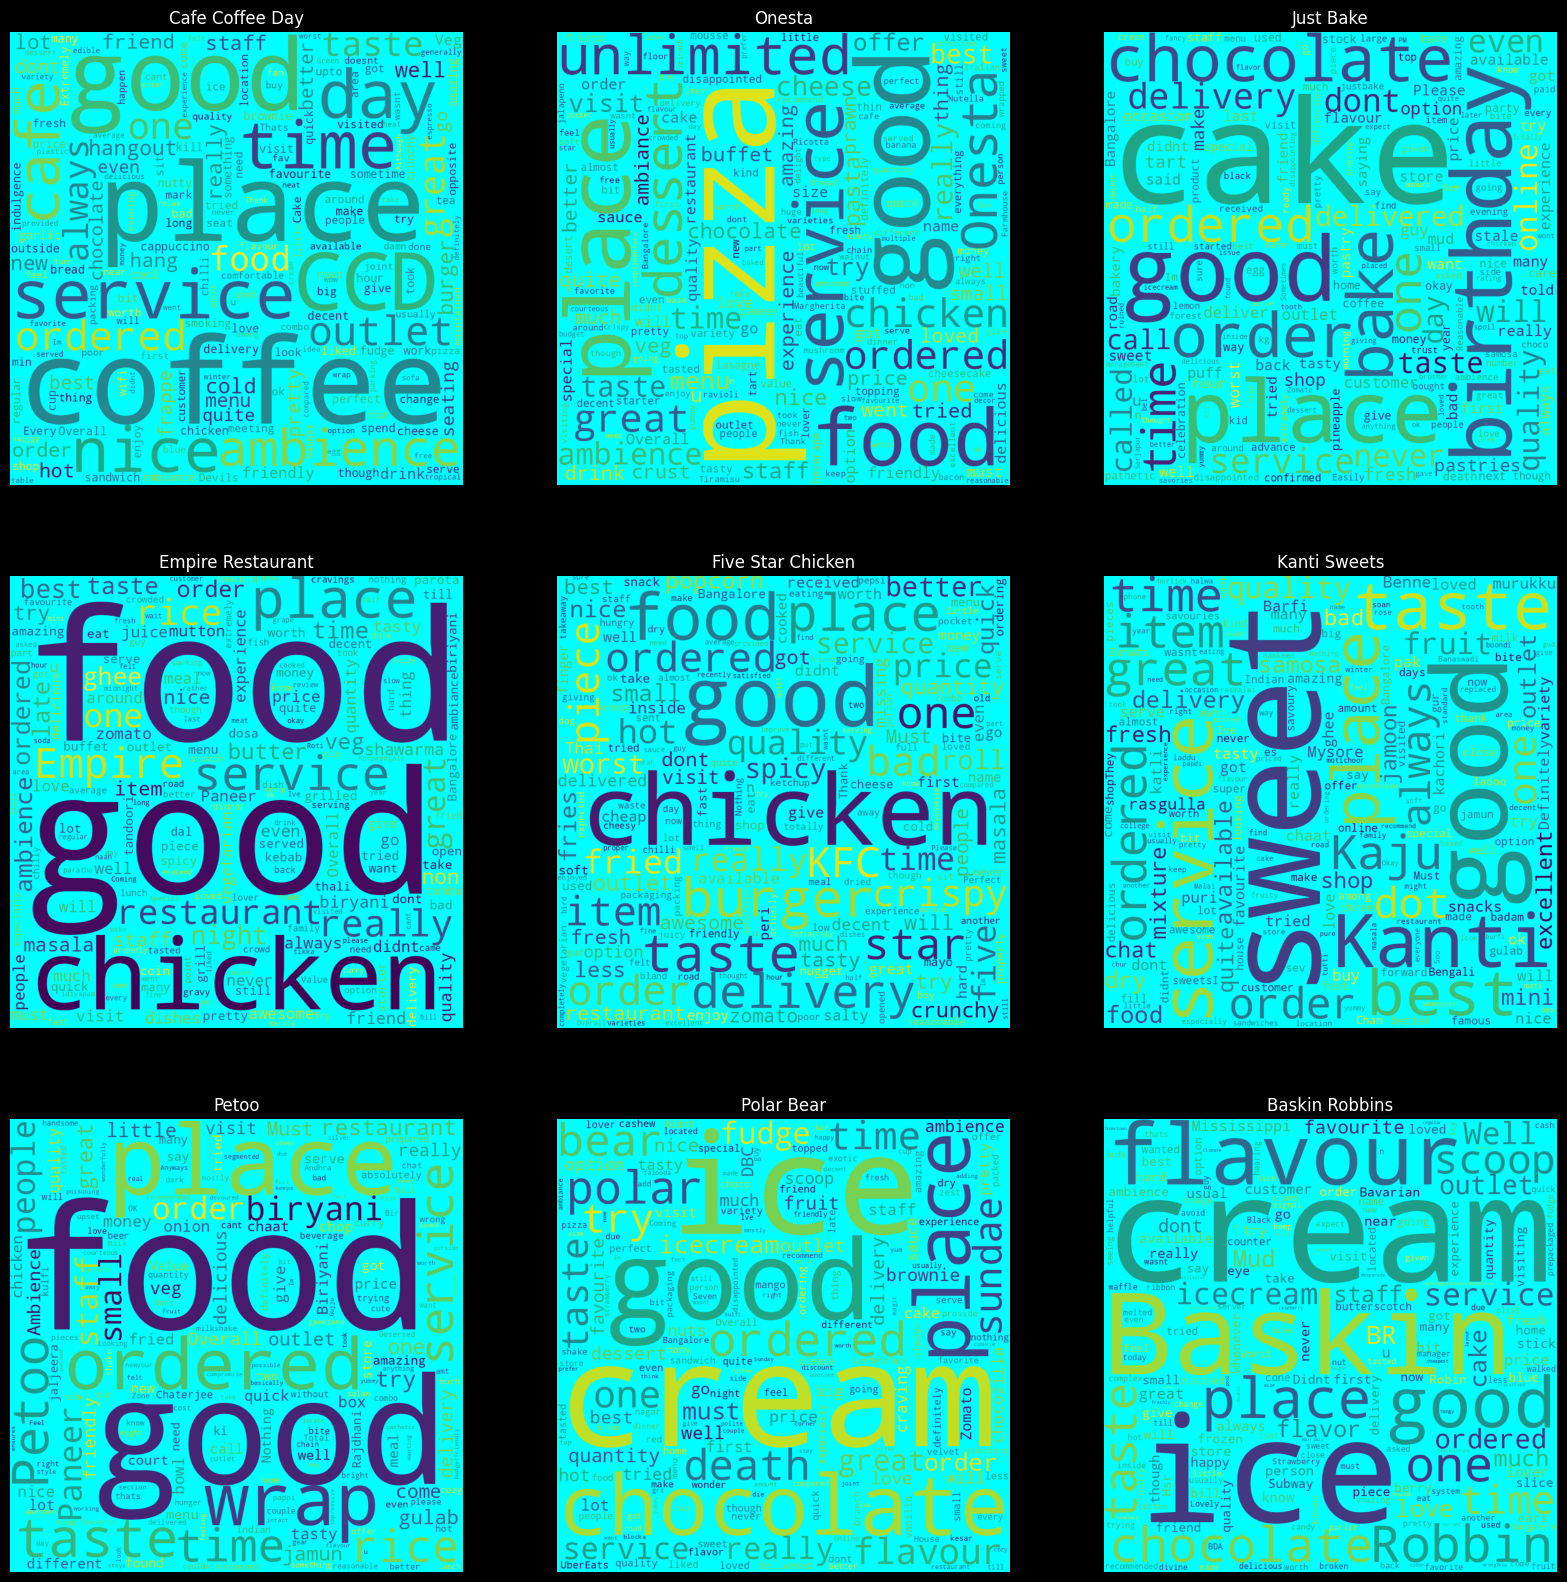

In [ ]:
rest=df['name'].value_counts()[:9].index
def produce_wordcloud(rest):

    plt.figure(figsize=(20,20))
    for i,r in enumerate(rest):
        plt.subplot(3,3,i+1)
        corpus=rating_df[rating_df['name']==r]['review'].values.tolist()
        corpus=' '.join(x  for x in corpus)
        wordcloud = WordCloud(max_font_size=None, background_color='cyan', collocations=False,
                      width=900, height=900).generate(corpus)
        plt.imshow(wordcloud)
        plt.title(r)
        plt.axis("off")




produce_wordcloud(rest)

### Text Processing

In [ ]:
df[['reviews_list','cuisines']].sample(5)

,reviews_list,cuisines
10384,"[('Rated 2.0', 'RATED\n Visited this place wh...",Desserts
48617,"[('Rated 3.0', 'RATED\n Sucha fun place to be...","South Indian, Beverages"
6267,"[('Rated 2.0', 'RATED\n Visited this place on...","Cafe, Fast Food"
11190,"[('Rated 4.0', 'RATED\n This place serves goo...",South Indian
44794,"[('Rated 3.0', 'RATED\n Quick Tip:- order the...","Kerala, South Indian, Seafood, Biryani"


In [ ]:
## lower casing
df['reviews_list'] = df['reviews_list'].str.lower()
df[['reviews_list', 'cuisines']].sample(5)

,reviews_list,cuisines
12183,"[('rated 5.0', 'rated\n loved the hazelnut mi...","Beverages, Fast Food"
19144,"[('rated 4.0', ""rated\n this place is just op...","American, Mexican, Italian, Steak"
13628,"[('rated 4.0', 'rated\n small little place wi...","Ice Cream, Desserts"
9021,"[('rated 4.0', 'rated\n very good location n ...","Andhra, Chinese, North Indian, Biryani"
11304,"[('rated 5.0', 'rated\n value for money.\ntas...","North Indian, Chinese, Rolls"


In [ ]:
# Removal of punctuations

import string

punc_to_remove = string.punctuation
def remove_punctuation(text):
    """custom function to remove the punctuation"""
    return text.translate(str.maketrans('','',punc_to_remove))

df['reviews_list'] = df['reviews_list'].apply(lambda text: remove_punctuation(text))
df[['reviews_list','cuisines']].sample(5)

,reviews_list,cuisines
37738,rated 30 ratedn ok so i didnãx83ãx83ãx82ã...,"American, Cafe, Continental"
10171,rated 40 ratedn really goodabsolutely love th...,"Mithai, Desserts"
24273,rated 30 ratedn i wanted to try authentic ara...,Arabian
1424,rated 40 ratedn they make instant ice cream w...,Ice Cream
3785,rated 50 ratedn best place to hangout with fr...,"Cafe, Fast Food"


In [ ]:
## Removal of stopwords

import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
def remove_stopwords(text):
    """custom function to remove the stopwords"""
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

df['reviews_list'] = df['reviews_list'].apply(lambda text: remove_stopwords(text))

In [ ]:
## Remove of URLs

import re

def remove_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'',text)

df['reviews_list'] = df['reviews_list'].apply(lambda text: remove_urls(text))

In [ ]:
df[['reviews_list','cuisines']].sample(5)

,reviews_list,cuisines
38854,rated 30 ratedn ordered chicken dum biriyani p...,"North Indian, Chinese"
10855,rated 40 ratedn quiet beautiful setup inside f...,"Cafe, Street Food"
38249,rated 30 ratedn frequenting place lunch time q...,"North Indian, Chinese"
38794,rated 40 ratedn food good lunch daily recently...,"South Indian, North Indian, Chinese"
50915,rated 20 ratedn good ordered food breakfast di...,"Asian, Salad, Italian"


* We can see that Five Star Chicken, Domino's Pizza, and McDonald's are the most popular restauant chains for Quick Bites in Bangalore.

## Building up Recommendation System

### Text Vectorization

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
def get_top_words(column, top_nu_of_words, nu_of_word):
    vec = CountVectorizer(ngram_range=nu_of_word, stop_words='english')
    bow = vec.fit_transform(column)
    sum_words = bow.sum(axis=0)
    words_freq = [(word, sum_words[0,idx]) for word, idx in vec.vocabulary.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:top_nu_of_words]

In [ ]:
df.head()

In [ ]:
df.shape

### Building Model

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split

In [ ]:
# Randomly sample 50% of your dataframe
df_percent = df.sample(frac=0.5)

In [ ]:
df_percent.shape

(25733, 17)

In [ ]:
df_percent.set_index('name', inplace=True)

In [ ]:
indices = pd.Series(df_percent.index)
indices

0                           Desi Chai
1        Hyderabadi Bawarchi Biriyani
2                          Penta Cafe
3                       Sweet Chariot
4                 Cup Chronicles Cafe
                     ...             
25728                  Mainland China
25729                  Dhang Ka Khana
25730                          BanBay
25731                     Bakers Town
25732           Malnad Military Hotel
Name: name, Length: 25733, dtype: object

Cosine similarity is a measure of similarity between two non-zero vectors of an inner product space that measures the cosine of the angle between them. In other words, it is a measure of the angle between two vectors in a space, with a value between -1 and 1.

The cosine similarity between two vectors is equal to the dot product of the vectors divided by the product of their magnitudes.

In [ ]:
# Split the dataset into training and test sets
train_df, test_df = train_test_split(df_percent, test_size=0.2, random_state=42)

In [ ]:
## Create TF-IDF matrix

tfidf = TfidfVectorizer(analyzer='word', ngram_range=(1,2), min_df=0, stop_words='english')
tfidf_matrix = tfidf.fit_transform(df_percent['reviews_list'])

In [ ]:
# Compute the cosine similarity matrix on the training set
from sklearn.metrics.pairwise import linear_kernel
cosine_similarity = linear_kernel(tfidf_matrix, tfidf_matrix)

In [ ]:
## recommendation system

def recommend(name, cosine_similarities=cosine_similarity):
    # create a list to put top restaurants
    recommend_restaurant = []

    # find the index of the hotel entered
    idx = indices[indices==name].index[0]

    # find the restaurants with a similar cosine-sim value and order them from bigger number
    score_series = pd.Series(cosine_similarities[idx]).sort_values(ascending=False)

    # Extract top 30 restaurant indexes with a similar cosine-sim value
    top30_indexes = list(score_series.iloc[0:31].index)

    # Name of top 30 restaurants
    for each in top30_indexes:
        recommend_restaurant.append(list(df_percent.index)[each])

    # Creating the new data set to show similar restaurants
    df_new = pd.DataFrame(columns=['cuisines','Mean Rating','cost'])


    # Create the top 30 similar restaurants with some of their columns
    for each in recommend_restaurant:
        df_new = df_new.append(pd.DataFrame(df_percent[['cuisines','Mean Rating', 'cost']][df_percent.index==each].sample()))

    # Drop the same named restaurants and sort only the top 10 by the highest rating
    df_new = df_new.drop_duplicates(subset=['cuisines','Mean Rating','cost'],keep=False)
    df_new = df_new.sort_values(by='Mean Rating',ascending=False).head(10)
    print('TOP %s RESTAURANTS LIKE %s WITH SIMILAR REVIEWS: ' %(str(len(df_new)),name))

    return df_new

In [ ]:
recommend('Pai Vihar')

TOP 8 RESTAURANTS LIKE Pai Vihar WITH SIMILAR REVIEWS: 


,cuisines,Mean Rating,cost
Cinnamon,"North Indian, Chinese, Biryani",3.62,550.0
Kadai Crust - Amma Veetu Samayal,"Chettinad, South Indian, Biryani",3.58,700.0
Upahar Sagar,"South Indian, Chinese, North Indian",3.58,350.0
Juicemaker,"Beverages, Fast Food",3.56,400.0
Magix's Parattha Roll,"Fast Food, North Indian, Chinese, Mughlai, Rolls",3.52,400.0
Samosa Singh,"Street Food, Fast Food, Rolls, Desserts",3.46,200.0
Cafe Mondo,"Cafe, Italian, Pizza, Chinese",3.39,700.0
Juice Shop,"Juices, Beverages, Ice Cream",3.16,150.0


In [ ]:
recommend('Onesta')

TOP 3 RESTAURANTS LIKE Onesta WITH SIMILAR REVIEWS: 


,cuisines,Mean Rating,cost
Brik Oven,"Cafe, Pizza, Beverages",4.4,1100.0
Midnight Pizza Slurpp,"Italian, Pizza",3.45,700.0
Pizza Stop,"Pizza, Italian",3.27,500.0


In [ ]:
recommend('Cafe Coffee Day')

TOP 10 RESTAURANTS LIKE Cafe Coffee Day WITH SIMILAR REVIEWS: 


,cuisines,Mean Rating,cost
The Sugar Fairy,"Bakery, Desserts",4.23,100.0
Cakesta,"Bakery, Desserts",3.97,500.0
Cafe Arabica,"Cafe, Bakery, Arabian, Fast Food",3.65,700.0
The Pastry House,"Bakery, Desserts",3.58,400.0
MRA,Bakery,3.53,200.0
Cake Gallery,Bakery,3.32,300.0
Chef Baker's,"Bakery, Desserts",3.31,400.0
INDULGE by InnerChef,"Desserts, Bakery",3.19,400.0
Just Bake,"Bakery, Desserts",3.09,400.0
Cafe Coffee Day,"Cafe, Fast Food",2.93,900.0


In [ ]:
# Deploying the Model
import pickle
# Serialize the TF-IDF model
with open('tfidf_model.pkl', 'wb') as f:
    pickle.dump(tfidf_matrix, f)
print("Model")

In [ ]:
import pickle
from sklearn.feature_extraction.text import TfidfVectorizer

# Load the TF-IDF model
with open('tfidf_model.pkl', 'rb') as f:
    tfidf_model = pickle.load(f)
